## New Beach Presence Notebook

Third figure request for Stephanie

Need to:

cartopy

update the field

change to %

change to viridis

In [1]:
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [3]:
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [4]:
data3d_7 = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first240_beachpresence7.nc')

In [5]:
oil = np.ma.masked_array(data3d_7.oilbeach, data3d_7.oilbeach < 0.01)

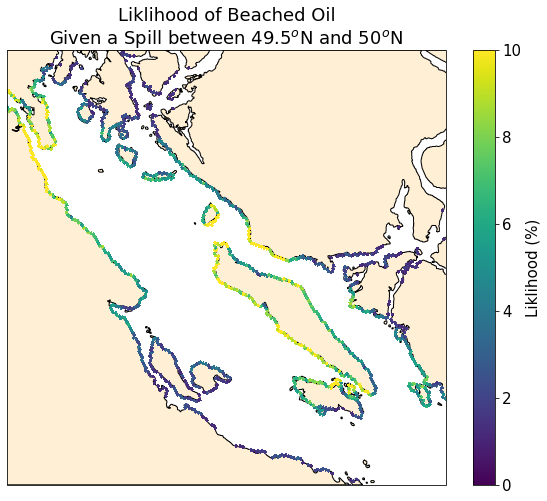

In [14]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.pcolormesh(
    mesh.nav_lon[1:-1, 1:-1], mesh.nav_lat[1:-1, 1:-1], oil*100, vmin=0, vmax=10,
     transform=crs.PlateCarree(), zorder=2,
)
cb = fig.colorbar(C, ax=ax);
cb.set_label('Liklihood (%)')
ax.set_title("Liklihood of Beached Oil\nGiven a Spill between 49.5$^o$N and 50$^o$N");